In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [57]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,user_id,video_id,video_duration,watch_time,liked,commented,subscribed_after,category,device,watch_time_of_day,recommended,clicked,timestamp,watch_percent,id
0,59445,40936,1134.886052,1287.412446,1,0,0,Sports,Tablet,Afternoon,1,0.0,2025-09-07 02:10:34,1.000000,283860
1,55829,17468,1335.223001,1224.760878,0,0,0,Gaming,Mobile,Night,1,0.0,2025-09-22 04:16:24,NaN,632997
2,68379,41436,2880.210321,1506.440934,1,0,0,Comedy,Desktop,Morning,0,0.0,2025-09-14 13:48:16,0.588424,94152
3,70789,17131,2975.577309,2327.012776,0,0,0,Comedy,TV,Evening,0,0.0,2024-01-21 03:33:17,NaN,483728
4,15748,1956,1022.594859,1041.854002,0,0,0,Gaming,Tablet,Evening,0,0.0,2023-02-03 19:40:06,0.978261,189031


In [58]:
train.shape

(610310, 15)

In [59]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610310 entries, 0 to 610309
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            610310 non-null  int64  
 1   video_id           610310 non-null  int64  
 2   video_duration     610310 non-null  float64
 3   watch_time         610310 non-null  float64
 4   liked              567185 non-null  object 
 5   commented          610310 non-null  int64  
 6   subscribed_after   610310 non-null  int64  
 7   category           610310 non-null  object 
 8   device             610310 non-null  object 
 9   watch_time_of_day  610310 non-null  object 
 10  recommended        610310 non-null  int64  
 11  clicked            610310 non-null  float64
 12  timestamp          610310 non-null  object 
 13  watch_percent      556381 non-null  float64
 14  id                 610310 non-null  int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 69

In [60]:
train.describe()

,user_id,video_id,video_duration,watch_time,commented,subscribed_after,recommended,clicked,watch_percent,id
count,610310.000000,610310.000000,610310.000000,610310.000000,610310.000000,610310.000000,610310.000000,610310.000000,5.563810e+05,610310.000000
mean,49999.851988,25007.183431,1910.525065,1282.582449,0.099682,0.050215,0.399640,0.146191,inf,381572.482891
std,28877.435215,14434.321850,3251.099282,2468.501280,0.299576,0.218389,0.489825,0.353307,NaN,220232.957454
min,1.000000,1.000000,0.000000,-342.773810,0.000000,0.000000,0.000000,0.000000,-2.980000e-03,1.000000
25%,24976.000000,12500.000000,918.951848,495.535339,0.000000,0.000000,0.000000,0.000000,4.993823e-01,190994.250000
50%,50026.000000,25007.000000,1811.445021,1066.165293,0.000000,0.000000,0.000000,0.000000,9.965458e-01,381703.500000
75%,75030.000000,37527.000000,2703.680628,1813.053282,0.000000,0.000000,1.000000,0.000000,1.000000e+00,572295.750000
max,100000.000000,50000.000000,115032.647484,134320.539232,1.000000,1.000000,1.000000,2.000000,inf,762888.000000


In [61]:
train.isna().sum()

,0
user_id,0
video_id,0
video_duration,0
watch_time,0
liked,43125
commented,0
subscribed_after,0
category,0
device,0
watch_time_of_day,0


In [62]:
train['watch_percent'] = train['watch_percent'].fillna(train['watch_percent'].median())


In [63]:
print(train['liked'].unique())

['1' '0' 'yes' nan '2' 'no']


In [64]:
train['liked'] = train['liked'].replace({'yes': 1, 'no': 0, '1': 1, '0': 0, '2': np.nan})
train['liked'] = train['liked'].fillna(train['liked'].mode()[0])
train['liked'] = train['liked'].astype(int)

/tmp/ipython-input-351542662.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['liked'] = train['liked'].replace({'yes': 1, 'no': 0, '1': 1, '0': 0, '2': np.nan})


In [65]:
train.isna().sum()

,0
user_id,0
video_id,0
video_duration,0
watch_time,0
liked,0
commented,0
subscribed_after,0
category,0
device,0
watch_time_of_day,0


In [66]:
train.dropna(inplace=True)

In [67]:
train.isna().sum()

,0
user_id,0
video_id,0
video_duration,0
watch_time,0
liked,0
commented,0
subscribed_after,0
category,0
device,0
watch_time_of_day,0


In [68]:
train['category'].unique()


array(['Sports', 'Gaming', 'Comedy', 'Education', 'Music', 'News',
       'Lifestyle', 'Tech', 'Ed', 'Tech ', 'gamingg', 'COMEDY', 'music',
       'MUsic'], dtype=object)

In [69]:

train['category'] = train['category'].astype(str).str.lower().str.strip()

category_map = {
    'sports': 'sports',
    'gaming': 'gaming',
    'gamingg': 'gaming',     # typo
    'comedy': 'comedy',
    'education': 'education',
    'ed': 'education',       # short form
    'music': 'music',
    'news': 'news',
    'lifestyle': 'lifestyle',
    'tech': 'tech',
}


train['category'] = train['category'].map(category_map).fillna('unknown')
train['category'].unique()


array(['sports', 'gaming', 'comedy', 'education', 'music', 'news',
       'lifestyle', 'tech'], dtype=object)

In [70]:
train['category'].unique()


array(['sports', 'gaming', 'comedy', 'education', 'music', 'news',
       'lifestyle', 'tech'], dtype=object)

In [71]:
train.duplicated().sum()

np.int64(0)

In [72]:
train = pd.get_dummies(train, columns=['category', 'device', 'watch_time_of_day'])

In [73]:
train.columns

Index(['user_id', 'video_id', 'video_duration', 'watch_time', 'liked',
       'commented', 'subscribed_after', 'recommended', 'clicked', 'timestamp',
       'watch_percent', 'id', 'category_comedy', 'category_education',
       'category_gaming', 'category_lifestyle', 'category_music',
       'category_news', 'category_sports', 'category_tech', 'device_Desktop',
       'device_Mobile', 'device_TV', 'device_Tablet',
       'watch_time_of_day_Afternoon', 'watch_time_of_day_Evening',
       'watch_time_of_day_Morning', 'watch_time_of_day_Night'],
      dtype='object')

Scale the identified numerical columns 'video_duration' and 'watch_time' in the train DataFrame using StandardScaler.



In [74]:
numerical_cols = ['video_duration', 'watch_time']
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [75]:
train['clicked'].value_counts()

,count
clicked,
0.0,521090
1.0,89218
2.0,2


In [76]:
train.loc[train['clicked'] == 2, 'clicked'] = 1

In [77]:
train['clicked'].value_counts()

,count
clicked,
0.0,521090
1.0,89220


In [78]:
print(train.isin([np.inf, -np.inf]).sum())

user_id                          0
video_id                         0
video_duration                   0
watch_time                       0
liked                            0
commented                        0
subscribed_after                 0
recommended                      0
clicked                          0
timestamp                        0
watch_percent                  546
id                               0
category_comedy                  0
category_education               0
category_gaming                  0
category_lifestyle               0
category_music                   0
category_news                    0
category_sports                  0
category_tech                    0
device_Desktop                   0
device_Mobile                    0
device_TV                        0
device_Tablet                    0
watch_time_of_day_Afternoon      0
watch_time_of_day_Evening        0
watch_time_of_day_Morning        0
watch_time_of_day_Night          0
dtype: int64


In [79]:
train = train.replace([np.inf, -np.inf], np.nan)
mean_val = train['watch_percent'].mean()
train['watch_percent'].fillna(mean_val, inplace=True)


/tmp/ipython-input-4185940675.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['watch_percent'].fillna(mean_val, inplace=True)


In [80]:
print(train.isin([np.inf, -np.inf]).sum())

user_id                        0
video_id                       0
video_duration                 0
watch_time                     0
liked                          0
commented                      0
subscribed_after               0
recommended                    0
clicked                        0
timestamp                      0
watch_percent                  0
id                             0
category_comedy                0
category_education             0
category_gaming                0
category_lifestyle             0
category_music                 0
category_news                  0
category_sports                0
category_tech                  0
device_Desktop                 0
device_Mobile                  0
device_TV                      0
device_Tablet                  0
watch_time_of_day_Afternoon    0
watch_time_of_day_Evening      0
watch_time_of_day_Morning      0
watch_time_of_day_Night        0
dtype: int64


In [81]:
X = train.drop(['clicked', 'user_id', 'video_id', 'timestamp', 'id'], axis=1)
y = train['clicked']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f'AUC-ROC Score: {roc_auc:.4f}')

Accuracy: 0.8538
Confusion Matrix:
[[104218      0]
 [ 17844      0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    104218
         1.0       0.00      0.00      0.00     17844

    accuracy                           0.85    122062
   macro avg       0.43      0.50      0.46    122062
weighted avg       0.73      0.85      0.79    122062

AUC-ROC Score: 0.4995


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
train['clicked'].value_counts()


,count
clicked,
0.0,521090
1.0,89220


#1. Attempt with class weights
due to imbalance in classes

In [85]:
model = LogisticRegression(class_weight='balanced', max_iter=500)

model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred2)
print('Classification Report:')
print(class_report)

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'AUC-ROC Score: {roc_auc:.4f}')

Accuracy: 0.5062
Confusion Matrix:
[[53093 51125]
 [ 9146  8698]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.51      0.64    104218
         1.0       0.15      0.49      0.22     17844

    accuracy                           0.51    122062
   macro avg       0.50      0.50      0.43    122062
weighted avg       0.75      0.51      0.58    122062

AUC-ROC Score: 0.4995


# 2. Attempt with Random Forest

as accuracy and auc is low

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred3 = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

print("\nAUC-ROC Score:", roc_auc_score(y_test, y_prob))

accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.4f}')

Confusion Matrix:
[[102036   2182]
 [ 17445    399]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91    104218
         1.0       0.15      0.02      0.04     17844

    accuracy                           0.84    122062
   macro avg       0.50      0.50      0.48    122062
weighted avg       0.75      0.84      0.78    122062


AUC-ROC Score: 0.5002193807929785
Accuracy: 0.8392


In [87]:
numeric_cols = train.select_dtypes(include=[np.number])

numeric_cols.corr()['clicked'].sort_values()



,clicked
recommended,-0.003095
id,-0.001173
liked,-0.000426
commented,-0.000056
watch_time,-0.000050
user_id,0.000175
video_id,0.000666
subscribed_after,0.001609
video_duration,0.001623
watch_percent,0.002301


In [88]:
train.columns


Index(['user_id', 'video_id', 'video_duration', 'watch_time', 'liked',
       'commented', 'subscribed_after', 'recommended', 'clicked', 'timestamp',
       'watch_percent', 'id', 'category_comedy', 'category_education',
       'category_gaming', 'category_lifestyle', 'category_music',
       'category_news', 'category_sports', 'category_tech', 'device_Desktop',
       'device_Mobile', 'device_TV', 'device_Tablet',
       'watch_time_of_day_Afternoon', 'watch_time_of_day_Evening',
       'watch_time_of_day_Morning', 'watch_time_of_day_Night'],
      dtype='object')

#Feature Engineering

In [89]:
train['user_avg_watch'] = train.groupby('user_id')['watch_time'].transform('mean')
train['user_video_count'] = train.groupby('user_id')['video_id'].transform('count')
train['video_view_count'] = train.groupby('video_id')['user_id'].transform('count')
train['video_avg_watch'] = train.groupby('video_id')['watch_time'].transform('mean')
train['normalized_watch'] = (train['watch_time'] / (train['video_duration'] + 1)).clip(0, 1)
train['log_watch_time'] = np.log1p(train['watch_time'])
train['log_duration'] = np.log1p(train['video_duration'])
train['user_video_match'] = train['watch_time'] / (train['user_avg_watch'] + 1)
train['timestamp'] = pd.to_datetime(train['timestamp'], errors='coerce')
train['hour'] = train['timestamp'].dt.hour
train['dayofweek'] = train['timestamp'].dt.dayofweek
train['is_weekend'] = (train['dayofweek'] >= 5).astype(int)



In [90]:
train = train.drop(columns=['user_id','video_id','id','timestamp'], errors='ignore')


In [91]:
train.select_dtypes(include=[np.number]).corr()['clicked'].sort_values()


,clicked
recommended,-0.003095
user_avg_watch,-0.002016
user_video_count,-0.000538
is_weekend,-0.000463
liked,-0.000426
log_watch_time,-0.000084
user_video_match,-0.000064
commented,-0.000056
watch_time,-0.000050
hour,0.000100


In [92]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve


print("Applying SMOTE to balance classes...")
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"After SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Applying SMOTE to balance classes...
After SMOTE:
clicked
0.0    416872
1.0    208436
Name: count, dtype: int64


In [93]:
print("\nTraining XGBoost...")

scale_pos = (y_train_smote == 0).sum() / (y_train_smote == 1).sum()

xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    scale_pos_weight=scale_pos,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

xgb_model.fit(
    X_train_smote, y_train_smote,
    eval_set=[(X_test, y_test)],
    verbose=50
)


Training XGBoost...
[0]	validation_0-logloss:0.69163
[50]	validation_0-logloss:0.67053
[100]	validation_0-logloss:0.66782
[150]	validation_0-logloss:0.66650
[200]	validation_0-logloss:0.66531
[250]	validation_0-logloss:0.66487
[300]	validation_0-logloss:0.66429
[350]	validation_0-logloss:0.66389
[400]	validation_0-logloss:0.66322
[450]	validation_0-logloss:0.66252
[499]	validation_0-logloss:0.66202


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

In [94]:

print("THRESHOLD TUNING")


y_proba = xgb_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
accuracies = []
f1_scores_list = []
recalls = []
precisions = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    accuracies.append(acc)

    f1 = f1_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)

    f1_scores_list.append(f1)
    recalls.append(recall)
    precisions.append(precision)

best_idx = np.argmax(accuracies)
best_threshold = thresholds[best_idx]
best_accuracy = accuracies[best_idx]

print(f"\nBest Threshold: {best_threshold:.3f}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

THRESHOLD TUNING

Best Threshold: 0.870
Best Accuracy: 0.8532 (85.32%)


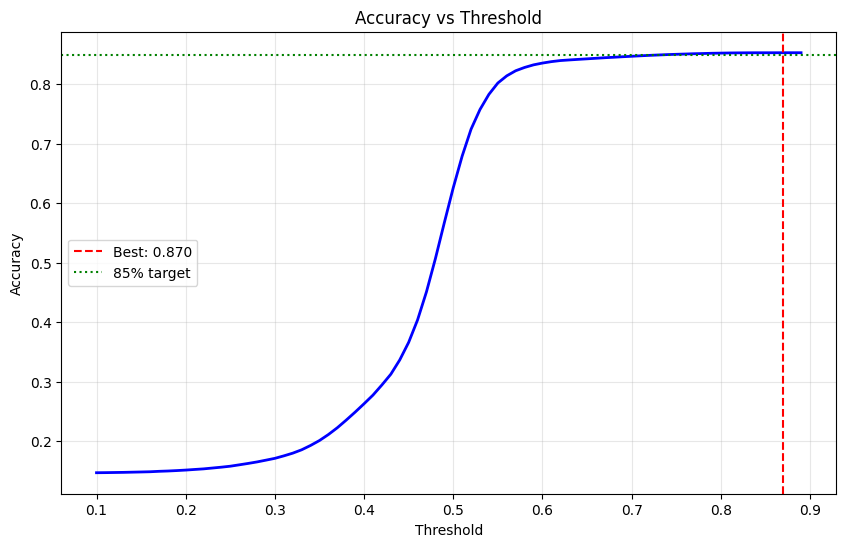

In [95]:
plt.figure(figsize=(10, 6))

# Accuracy vs Threshold
plt.plot(thresholds, accuracies, 'b-', linewidth=2)
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best: {best_threshold:.3f}')
plt.axhline(0.85, color='g', linestyle=':', label='85% target')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


FINAL EVALUATION

Confusion Matrix:
[[104126     92]
 [ 17830     14]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    104218
         1.0       0.13      0.00      0.00     17844

    accuracy                           0.85    122062
   macro avg       0.49      0.50      0.46    122062
weighted avg       0.75      0.85      0.79    122062


Final Metrics:
Accuracy: 0.8532 (85.32%)
AUC-ROC: 0.4995
F1 Score: 0.0016


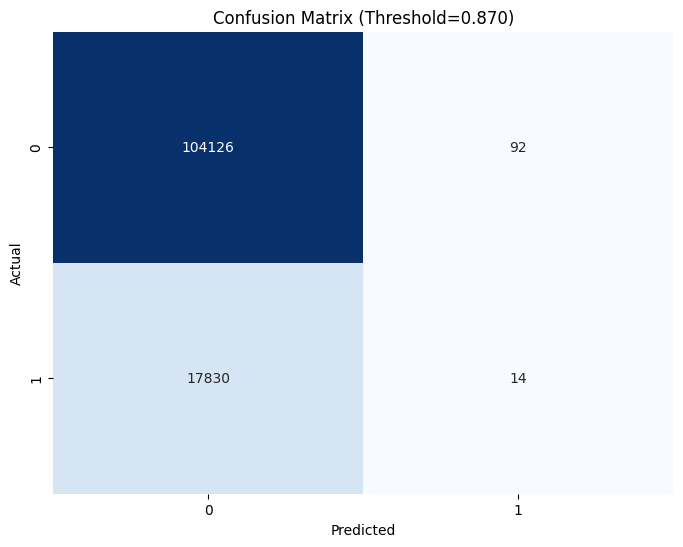

In [96]:
print("FINAL EVALUATION")

y_pred_best = (y_proba >= best_threshold).astype(int)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print(f"\nFinal Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f} ({accuracy_score(y_test, y_pred_best)*100:.2f}%)")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold={best_threshold:.3f})')
plt.show()



In [97]:
print("Loading and preprocessing test data...")

test = pd.read_csv("test.csv")
test_ids = test['id'].copy()  # Save IDs for submission

print(f"Test data shape: {test.shape}")

# APPLY SAME PREPROCESSING AS TRAINING DATA

test['watch_percent'] = test['watch_percent'].fillna(test['watch_percent'].median())

if 'liked' in test.columns:
    test['liked'] = test['liked'].replace({'yes': 1, 'no': 0, '1': 1, '0': 0, '2': np.nan})
    test['liked'] = test['liked'].fillna(0)  # Fill with 0 for test
    test['liked'] = test['liked'].astype(int)


Loading and preprocessing test data...
Test data shape: (152578, 14)


/tmp/ipython-input-810742358.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['liked'] = test['liked'].replace({'yes': 1, 'no': 0, '1': 1, '0': 0, '2': np.nan})


In [98]:
test.shape

(152578, 14)

In [99]:
test.isna().sum()

,0
user_id,0
video_id,0
video_duration,0
watch_time,0
liked,0
commented,0
subscribed_after,0
category,0
device,0
watch_time_of_day,0


In [100]:
test['category'].unique()


array(['Comedy', 'Gaming', 'Lifestyle', 'Education', 'News', 'Sports',
       'Music', 'Tech', 'music', 'MUsic', 'Tech ', 'gamingg', 'COMEDY',
       'Ed'], dtype=object)

In [101]:

test['category'] = test['category'].astype(str).str.lower().str.strip()

category_map = {
    'sports': 'sports',
    'gaming': 'gaming',
    'gamingg': 'gaming',     # typo
    'comedy': 'comedy',
    'education': 'education',
    'ed': 'education',       # short form
    'music': 'music',
    'news': 'news',
    'lifestyle': 'lifestyle',
    'tech': 'tech',
}


test['category'] = test['category'].map(category_map).fillna('unknown')
test['category'].unique()


array(['comedy', 'gaming', 'lifestyle', 'education', 'news', 'sports',
       'music', 'tech'], dtype=object)

In [102]:
test.duplicated().sum()

np.int64(0)

In [103]:
test = pd.get_dummies(test, columns=['category', 'device', 'watch_time_of_day'])
print(test.columns)

Index(['user_id', 'video_id', 'video_duration', 'watch_time', 'liked',
       'commented', 'subscribed_after', 'recommended', 'timestamp',
       'watch_percent', 'id', 'category_comedy', 'category_education',
       'category_gaming', 'category_lifestyle', 'category_music',
       'category_news', 'category_sports', 'category_tech', 'device_Desktop',
       'device_Mobile', 'device_TV', 'device_Tablet',
       'watch_time_of_day_Afternoon', 'watch_time_of_day_Evening',
       'watch_time_of_day_Morning', 'watch_time_of_day_Night'],
      dtype='object')


In [104]:
numerical_cols = ['video_duration', 'watch_time']
scaler = StandardScaler()
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])

In [105]:
print(test.isin([np.inf, -np.inf]).sum())

user_id                          0
video_id                         0
video_duration                   0
watch_time                       0
liked                            0
commented                        0
subscribed_after                 0
recommended                      0
timestamp                        0
watch_percent                  144
id                               0
category_comedy                  0
category_education               0
category_gaming                  0
category_lifestyle               0
category_music                   0
category_news                    0
category_sports                  0
category_tech                    0
device_Desktop                   0
device_Mobile                    0
device_TV                        0
device_Tablet                    0
watch_time_of_day_Afternoon      0
watch_time_of_day_Evening        0
watch_time_of_day_Morning        0
watch_time_of_day_Night          0
dtype: int64


In [106]:
test = test.replace([np.inf, -np.inf], np.nan)
mean_val = test['watch_percent'].mean()
test['watch_percent'].fillna(mean_val, inplace=True)


/tmp/ipython-input-1875845797.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['watch_percent'].fillna(mean_val, inplace=True)


In [107]:
print(test.isin([np.inf, -np.inf]).sum())

user_id                        0
video_id                       0
video_duration                 0
watch_time                     0
liked                          0
commented                      0
subscribed_after               0
recommended                    0
timestamp                      0
watch_percent                  0
id                             0
category_comedy                0
category_education             0
category_gaming                0
category_lifestyle             0
category_music                 0
category_news                  0
category_sports                0
category_tech                  0
device_Desktop                 0
device_Mobile                  0
device_TV                      0
device_Tablet                  0
watch_time_of_day_Afternoon    0
watch_time_of_day_Evening      0
watch_time_of_day_Morning      0
watch_time_of_day_Night        0
dtype: int64


In [108]:
test['user_avg_watch'] = test.groupby('user_id')['watch_time'].transform('mean')
test['user_video_count'] = test.groupby('user_id')['video_id'].transform('count')
test['video_view_count'] = test.groupby('video_id')['user_id'].transform('count')
test['video_avg_watch'] = test.groupby('video_id')['watch_time'].transform('mean')
test['normalized_watch'] = (test['watch_time'] / (test['video_duration'] + 1)).clip(0, 1)
test['log_watch_time'] = np.log1p(test['watch_time'])
test['log_duration'] = np.log1p(test['video_duration'])
test['user_video_match'] = test['watch_time'] / (test['user_avg_watch'] + 1)
test['timestamp'] = pd.to_datetime(test['timestamp'], errors='coerce')
test['hour'] = test['timestamp'].dt.hour
test['dayofweek'] = test['timestamp'].dt.dayofweek
test['is_weekend'] = (test['dayofweek'] >= 5).astype(int)



In [115]:
print("Preparing test data for prediction...")

X_test_final = test.drop(['user_id', 'video_id', 'timestamp', 'id'], axis=1, errors='ignore')

print(f"Test features shape: {X_test_final.shape}")
print(f"Training features shape: {X_train.shape}")


# Get training column names
train_columns = X_train.columns.tolist()

# Add missing columns to test (fill with 0)
for col in train_columns:
    if col not in X_test_final.columns:
        X_test_final[col] = 0
        print(f"Added missing column: {col}")

# Remove extra columns from test that aren't in training
extra_cols = [col for col in X_test_final.columns if col not in train_columns]
if extra_cols:
    print(f"Removing extra columns: {extra_cols}")
    X_test_final = X_test_final.drop(columns=extra_cols)

# Reorder columns to match training data exactly
X_test_final = X_test_final[train_columns]

print(f"\nFinal test shape: {X_test_final.shape}")
print(f"Training shape: {X_train.shape}")
print(f"Columns match: {list(X_test_final.columns) == list(X_train.columns)}")


print("\nMaking predictions on test data...")
test_probabilities = xgb_model.predict_proba(X_test_final)[:, 1]

print(f"Predictions generated: {len(test_probabilities)}")
print(f"Probability range: [{test_probabilities.min():.4f}, {test_probabilities.max():.4f}]")
print(f"Mean probability: {test_probabilities.mean():.4f}")

# Convert probabilities to binary predictions using best threshold
test_predictions_binary = (test_probabilities >= best_threshold).astype(int)

# Create submission dataframe with binary predictions
submission = pd.DataFrame({
    'id': test_ids,
    'clicked': test_predictions_binary
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved!")

print("\n" + "="*50)
print("SUBMISSION FILE PREVIEW")
print("="*50)
print(submission.head(10))
print(f"\nShape: {submission.shape}")
print(f"\nValue counts:")
print(submission['clicked'].value_counts())

Preparing test data for prediction...
Test features shape: (152578, 34)
Training features shape: (488248, 23)
Removing extra columns: ['user_avg_watch', 'user_video_count', 'video_view_count', 'video_avg_watch', 'normalized_watch', 'log_watch_time', 'log_duration', 'user_video_match', 'hour', 'dayofweek', 'is_weekend']

Final test shape: (152578, 23)
Training shape: (488248, 23)
Columns match: True

Making predictions on test data...
Predictions generated: 152578
Probability range: [0.0312, 0.9944]
Mean probability: 0.5123
✅ Submission file saved!

SUBMISSION FILE PREVIEW
       id  clicked
0   53363        0
1  293669        0
2   52195        0
3  260007        0
4  602213        0
5  665568        0
6   54608        0
7  123220        0
8  680716        0
9  256081        0

Shape: (152578, 2)

Value counts:
clicked
0    148896
1      3682
Name: count, dtype: int64
